In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import add_dummy_feature
import sklearn.metrics as metrics
from sklearn import linear_model

## Part A: Data Cleaning and Exploratory Analysis

<b>1. Import full data set using Pandas:

In [2]:
data = pd.read_csv("bottle.csv")
data.shape

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8976\2475262720.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("bottle.csv")


(864863, 74)

<b>2. Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values (Hint: Pandas has a method for this) .

In [3]:
data_1 = data[['T_degC', 'Salnty', 'STheta']]
data_1 = data_1.dropna()
data_1.shape

(812174, 3)

<b>3. Build the following plots using matplotlib:<br>
&emsp;a) Scatter: Salnty (salinity of water) vs T_degC

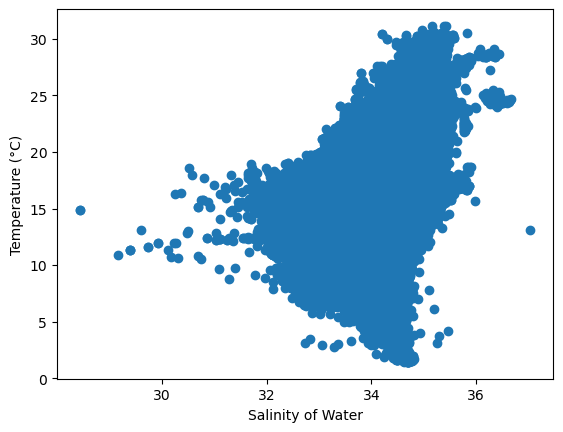

In [4]:
plt.scatter(data_1['Salnty'], data_1['T_degC'])
plt.xlabel("Salinity of Water")
plt.ylabel("Temperature (°C)")
plt.show()

<b>b) Scatter: STheta (density of water) vs T_degC

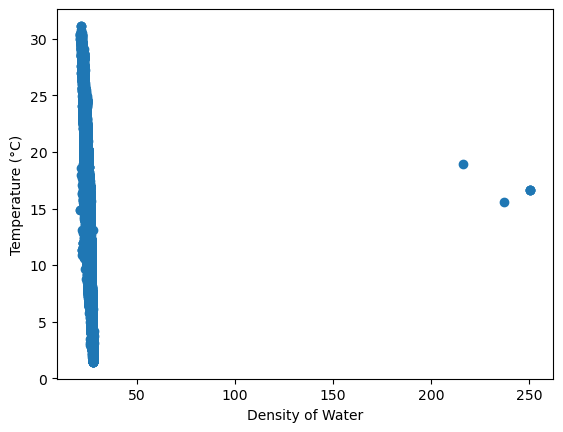

In [5]:
plt.scatter(data_1['STheta'], data_1['T_degC'])
plt.xlabel("Density of Water")
plt.ylabel("Temperature (°C)")
plt.show()

<b>4. Build the following plot using seaborn:<br>
&emsp;a) Distribution of T_degC (hint: distplot will be helpful here)

c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


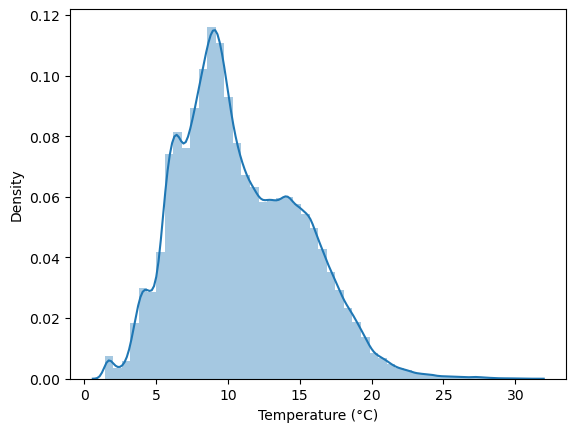

In [6]:
sns.distplot(data_1['T_degC'])
plt.xlabel("Temperature (°C)")
plt.show()

<b>5. Remove obvious outliers from step 3b:

In [7]:
data_2 = data_1[~(data_1['STheta'] > 50)]
data_2.shape

(812168, 3)

<b>6. Plot 3b again – does it look better? Explain!

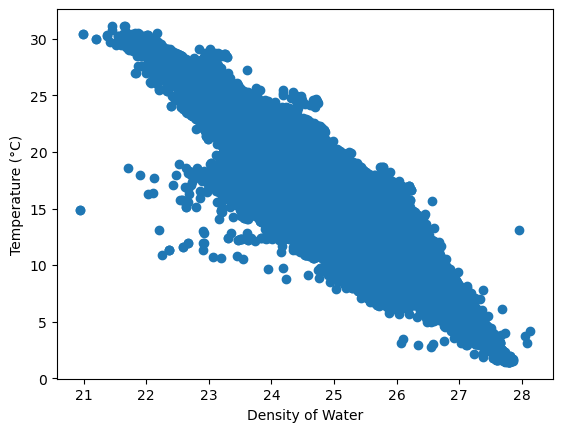

In [8]:
plt.scatter(data_2['STheta'], data_2['T_degC'])
plt.xlabel("Density of Water")
plt.ylabel("Temperature (°C)")
plt.show()

The initial plot in 3b shows few outliers that have a substantially higher value than the majority of the data. Due to the visualization of all the data points, the graph is unable to display significant details. However, removing the outliers with values greater than 50°C enables the graph to display all the points more effectively over an appropriate scale as seen in the above graph.

# Part B: Train & Test Split:

In [9]:
X = data_2.drop(['T_degC'], axis = 1)
y = data_2[['T_degC']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size= 0.2, random_state=42)

# Part C: Linear Regression Using Normal Equation - Coded In Python

<b>1. Build the normal equation using numpy & fit using your training data (X_train & y_train).
- Note: Make sure to include an intercept value of 1 for every observation in your X_train

In [10]:
X_train_b = add_dummy_feature(X_train) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train.values

<b>2. Print out the coefficients - we will need to compare these to the output in Part 4

In [11]:
theta_best

array([[35.64451188],
       [ 3.11151204],
       [-5.03907257]])

<b>3. Predict T_degC for the test data using the fitted values in b.
- Make sure to include an intercept value of 1 for every observation in your X_test.
- Call predictions y_pred

In [12]:
X_test_b = add_dummy_feature(X_test)  # add x0 = 1 to each instance
y_pred = X_test_b @ theta_best
y_pred

array([[ 7.88437556],
       [ 7.14969722],
       [ 5.22668207],
       ...,
       [ 7.14752462],
       [16.11974133],
       [15.64019849]])

<b>4. Calculate the following for the test data:
- mean squared error
- r-squared<br>
- explained variance

In [13]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

pd.DataFrame({'Metric': ['Mean Squared Error', 'R-squared', 'Explained Variance'],
              'Score': [mse, r2, ev]})

,Metric,Score
0,Mean Squared Error,0.233783
1,R-squared,0.986892
2,Explained Variance,0.986892


<b>5. Create a scatterplot that shows actual versus predicted values for the T_degC.

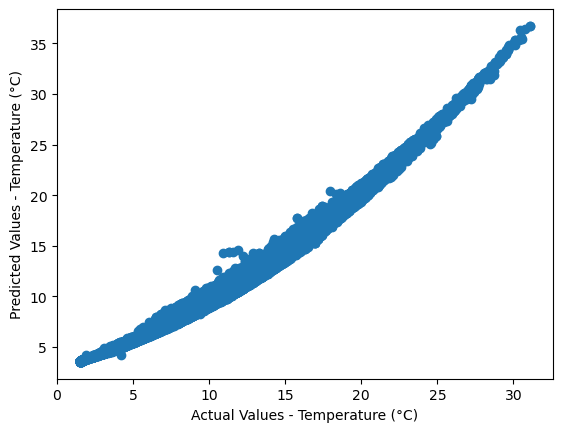

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values - Temperature (°C)")
plt.ylabel("Predicted Values - Temperature (°C)")
plt.show()

# Part D: Using sklearn API

<b>1. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.

In [15]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

<b>2. Print out the coefficients (including the intercept)

In [16]:
lin_reg.coef_, lin_reg.intercept_

(array([[ 3.11151204, -5.03907257]]), array([35.64451188]))

<b>3. Predict T_degC for the test data using the fitted values in b.
- Call predictions y_pred_sklearn

In [17]:
y_pred_sklearn = lin_reg.predict(X_test)
y_pred_sklearn

array([[ 7.88437556],
       [ 7.14969722],
       [ 5.22668207],
       ...,
       [ 7.14752462],
       [16.11974133],
       [15.64019849]])

<b>4. Calculate the following for the test data:
- mean squared error
- r-squared
- explained variance

In [18]:
mse_sk = metrics.mean_squared_error(y_test, y_pred_sklearn)
r2_sk = metrics.r2_score(y_test, y_pred_sklearn)
ev_sk = metrics.explained_variance_score(y_test, y_pred_sklearn)

pd.DataFrame({'Metric using sklearn': ['Mean Squared Error', 'R-squared', 'Explained Variance'],
              'Score': [mse_sk, r2_sk, ev_sk]})

,Metric using sklearn,Score
0,Mean Squared Error,0.233783
1,R-squared,0.986892
2,Explained Variance,0.986892


<b>5. Create a scatterplot that shows actual versus predicted values for the T_degC.

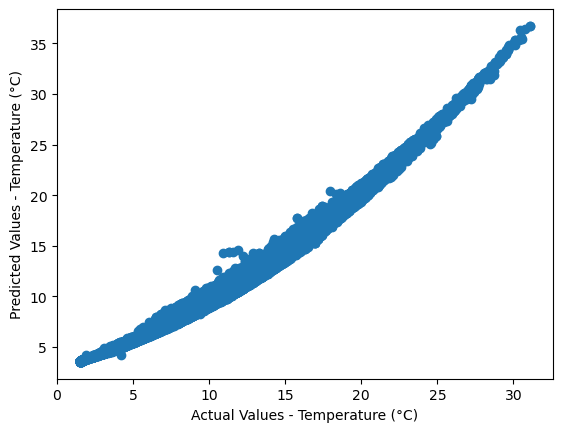

In [19]:
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel("Actual Values - Temperature (°C)")
plt.ylabel("Predicted Values - Temperature (°C)")
plt.show()

# Part E: Conceptual Questions

<b>1. Why is it important to have a test set?<br></b>
A model that is trained on data of samples that it has seen would have a perfect score as it would repeat the same labels, however it would perform poorly and wouldn't be able to predict anything useful on unseen data. This is called overfitting and in order to avoid it, the available data is split into X_test and y_test (test sets).

<b>2. If the normal equation always provides a solution, when would we not want to use it?<br></b>
The normal equation would not want to be used in the following cases:<br>
    1. <u>Large Datasets:</u> The computational complexity of inverting a matrix increases with the size of the dataset. Alternates like gradient descent may then be used.<br>
    2. <u>Online Learning:</u> The normal equation provides a closed-fom solution for finding the optimal parameters of a linear regression model. Thus, there is no need for iterative updates. However, as new data arrives regularly in the case of online learning, the parameters would have to be updated at each instance from scratch and therefore the normal equation is not suitable for online learning.<br>
    3. <u>Non-Linear models:</u> The normal equation is only applicable to linear regression models and not non-linear.<br>
    4. <u>Overfitting:</u> If the number of features in the model is high relative to the number of observations, the normal equation can produce overfitting. In this case, regularization techniques such as Lasso or Ridge regression can be used to prevent overfitting.

<b>3. How might we improve the fit of our models from Part C & D?<br></b>
The normal equation assumes that the data is normalized, which means that the mean of each feature is zero and the standard deviation is one. The data for Part C & D are not normalized, thus normalizing the data might help improve the models.

<b>4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. <br></b>
- <u>Bias:</u> Low capacity model that does not fit the training data well. Has a high training error and the model is too simple to detect patterns in the data leading to underfitting.
- <u>Variance:</u> High capacity model that learns the training data too well. Has a high generalization error and the model detects patterns in the noise as well leading to overfitting.

<b>5. In a linear regression model, how might we reduce bias?</b><br>
Bias can be reduced using the following techniques:<br>
- <u>Include more relevant features:</u> If the model is underfitting, meaning it has high bias and low variance, we can try to include more relevant features in the model to capture the underlying patterns in the data. However, we should avoid adding irrelevant or redundant features as they can lead to overfitting.
- <u>Increase the model complexity:</u> Try increasing the model's complexity by adding more parameters to the model. However, we should be careful not to overfit the model to the training data, which can lead to high variance.
- <u>Use regularization:</u> Regularization techniques like Ridge, Lasso, or ElasticNet regression can help reduce bias by introducing a penalty term to the loss function, which encourages the model to have smaller parameter values.
- <u>Remove outliers:</u> Outliers in the data can affect the linear regression model's fit, leading to high bias. Removing outliers can help reduce bias and improve the model's fit.
- <u>Rescale the features:</u> If the features are on different scales, rescaling them can help reduce bias. This is because features on a larger scale may have a greater influence on the model's predictions than features on a smaller scale.

<b>6. In a linear regression model, how might we reduce variance?<br></b>
- <u>Use more training data:</u> One of the most effective ways to reduce variance is to use more training data. This can help the model learn a more accurate representation of the underlying patterns in the data and reduce the impact of random fluctuations in the training data.
- <u>Reduce model complexity:</u> If the model is overfitting, we can try reducing its complexity by removing irrelevant features or using regularization techniques like Ridge, Lasso, or ElasticNet regression. These techniques introduce a penalty term to the loss function, encouraging the model to have smaller parameter values, which can help prevent overfitting and reduce variance.
- <u>Cross-validation:</u> Cross-validation can help estimate the model's variance by evaluating its performance on multiple subsets of the data. By comparing the model's performance on different subsets of the data, we can get an estimate of its variance and adjust its complexity accordingly.
- <u>Ensemble methods:</u> Ensemble methods like bagging, boosting, and random forests can help reduce variance by combining multiple models trained on different subsets of the data. By averaging the predictions of multiple models, we can reduce the impact of random fluctuations in the data and improve the model's generalization performance.